 # Sistemas de recomendacion
 Economicamente es de bastante interes. El 80% de usuarios de Netflix ven peliculas (documentales) por sistemas de recomendacion. Antes era mas por lo que los amigos y familiares sugerian. El 35% amazon, los productos son sugeridos por sistemas de recomiendacion.

 Algunos sistemas de recomendacion importantes.

 * Spotity (sugiere canciones)
 * Netflix, Hulu, PrimeVideo, YouTube
 * Amazon
 * Retailers: Walmart, Target
 * Mercado libre
 * Ali ba-ba

 Hay dos tipos de informacion
 * Explicita: Cuando usted directamente califica un producto. (supervisado)
 * Implicio: El tiempo que usted pase en una pagina, video, o texto. O el numero de visitas a una pagino.  (no supervisado).

 Hay dos sistemas que vemos de recomendacion:

 1. Basado en contenido
 2. Collaborative Filtering (filtro colaborativo).

 ## Sistema basado en contenido.

 Tipicamente no todas las peliculas se califican. Es posible
 que un amigo (alguien con los mismos gustos) halla calificado un pelicula, y a usted le llegue la recomendacion.
 Como cuantificamos este problema?




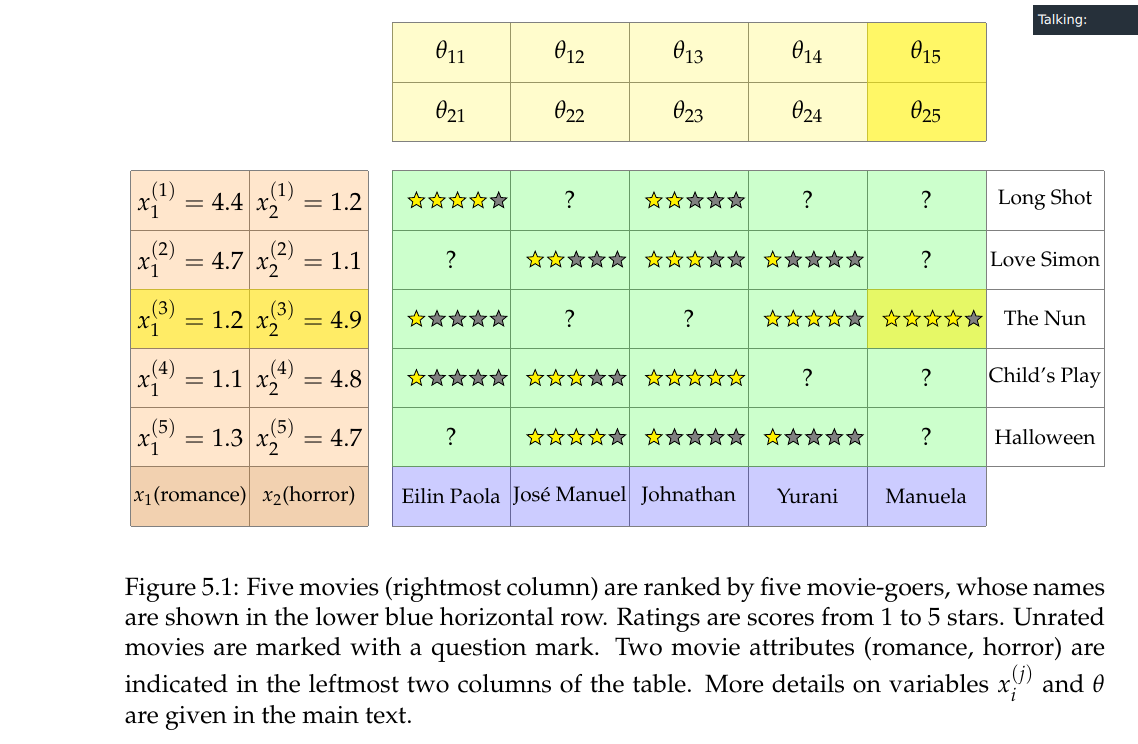

### Variables y valores
Los valores estan entre 1 y 5, tanto para las etiquetas $y$ como para los "features" $X$.
$n_f$ numero de features, en el ejemplo $n_f=2$.
$n_u$ numero de usuarios, son 5

Dimensiones: $\Theta$ es del orden $n_f \times n_u$
$Y$ es del orden de $n_m \times n_u$ (en este caso es $5 \times 5$), $X$ es una matriz $n_m \times n_f$ es decir $5 \times 2$.

Este problema lo vamos  a ver como un problema de regresion


$$y_{ij} =  {x^{(i)}}^T \Theta_j .$$
(feature-user)

En particular, veamos el caso de $y_{35}$, pelicula: the nun, usuario Manuela.


$$y_{35} = x_1^{(3)} \theta_{15} + x_2^{(3)} \theta_{25} = (1.2, 4.9) \cdot (\theta_{15}, \theta_{25}) = 4.0 .$$



Para los metodos supervisados nosotros definimos una function objetivo y usando el gradiente resolvemos el problema de optimizacion.

Dos preguntas:
1. Cual es la funcion objetivo para este problema
2. Cual es el gradiente de la funcion objetivo.
3. Que pasa con los "?" (no fueron calificados).


Respondemos las preguntas 1, 3 y luego la 2.

La funcion objetivo es (obviamente)


Solucion a la pregunta 1.
$$J_{\theta} = \frac12 \| Y - X \Theta \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 . $$

Solucion a la pregunta 2.
Definimos una matriz auxiliar para aqueyas celdas que no fueron calificas.

\begin{eqnarray}
r_{ij} = \left \{
    \begin{array}{cc}
    1  & \text{si la pelicula $i$ fue calificada por el usuario $j$} \\
    0 & \text{en caso contrario}
    \end{array}
    \right .
\end{eqnarray}

Debemos **reescribir** la function de costo agregando la nueva matriz de **masking** $R=(r_{ij})$,


$$J_{\theta} = \frac12 \| R \circ (Y - X \Theta ) \|_F^2 + \frac{\lambda}{2} \| \Theta \|_F^2 . \tag{2} $$

## Colaborative Filtering.
Hay situaciones mas complicadas. Por ejemplo, por ahora vamos a pensar que tenemos $\Theta$ pero no tenemos $X$. No tenemos los features. Pero con $\Theta$ podemos obtener los features $X$?


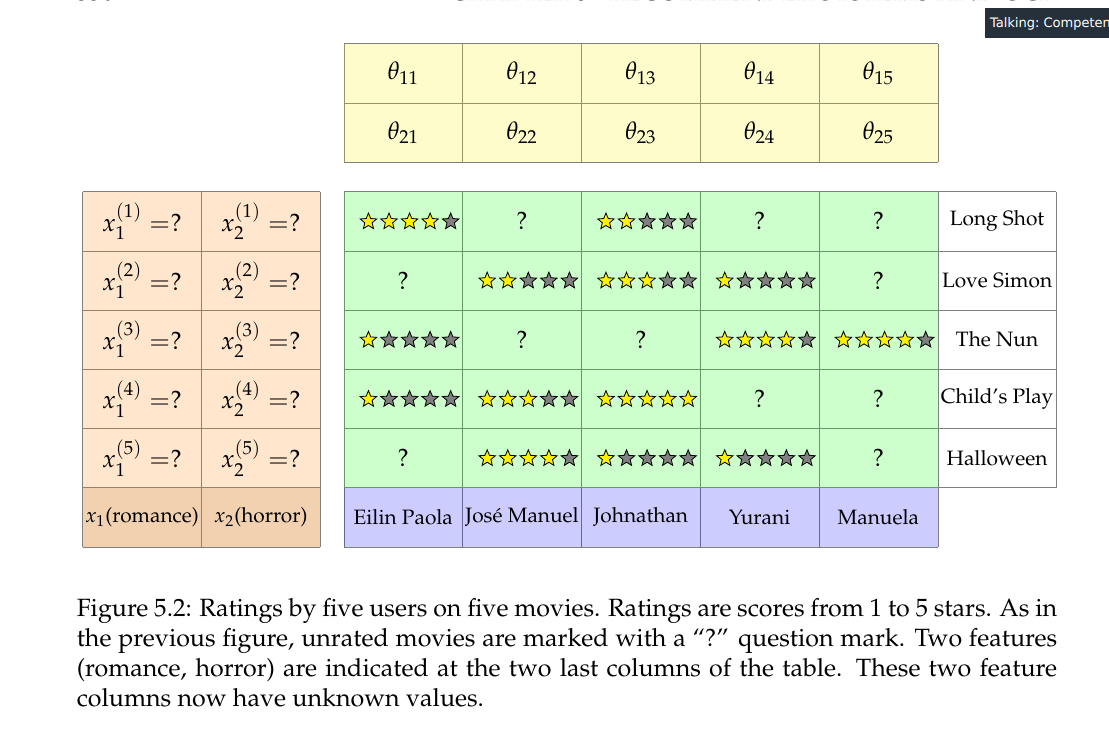

Planteamos un nuevo problema donde queremos hallar $X$ dado $\Theta$. Cual seria la nuevo funcion de costo.


$$J_{X} = \frac12 \| R \circ (Y - X \Theta ) \|_F^2 + \frac{\lambda}{2} \| X \|_F^2 . \tag{3} $$

Esta es la funcion de costo para resolver el problema de $\Theta$ conocido y $X$ no conocido.

Sin embargo en la practica esto no es asi. Lo mas probable es que no conozcomas ni $X$ ni $\Theta$? y unos pocos "lables" $Y$

Debemos definir una nueva funcion de costo que incluya ambos.

Vamos a disenhar dos herramientas para atacar este problema.
1. **Metodo Iterativo**: Inicilalmente generamos un $X_1$ aleatorio, si tenemos $X_1$ podemos calcular $\Theta_1$ (usando (2)). Ahora con este $\Theta_1$  hallamos $X_2$ usando (3), de igual forma con $X_2$ podemos hallar un $\Theta_2$ (usando 2)
Esto genera una secuencia:


$$X_1 \to \Theta_1 \to X_2 \to \Theta_2 \to \cdots \to X_n \to \Theta_n  .$$
Donde paramos? siempre existe un umbral.

2. Solucion **simulatena** de $X$, $\Theta$.
$$J_{\Theta, X} = \frac12 \| R \circ (Y - X \Theta ) \|_F^2 + \frac{\lambda}{2} ( \| \Theta \|_F^2  + \| X \|_F^2) \tag{4}  . $$


La pregunta 2 de arriba es cual es el gradiente de la funcion de costo.

Escribamos (4) usando indices


$$J = \frac12 \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \circ \left ( y_{ij} - \sum_{k=1}^{nf} x_{ik} \theta_{kj}  \right)^2 + \frac{\lambda}{2} \left ( \sum_{i=1}^{n_f} \sum_{j=1}^{n_u} \theta_{ij}^2 + \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}^2   \right ).$$


Tomemos la derivada de la funcion de costo

$$ \frac{\partial J}{\partial x_{st}} = \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \circ \left ( \sum_{k=1}^{nf} x_{ik} \theta_{kj} - y_{ij} \right) \sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}} + \lambda \left (  \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}  \frac{\partial x_{ij}}{\partial x_{st}}  \right ).$$

$$ \frac{\partial J}{\partial x_{st}} = \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \circ \left ( \sum_{p=1}^{nf} x_{ip} \theta_{pj} - y_{ij} \right) \sum_{k=1}^{n_f} \theta_{kj} \frac{\partial x_{ik}}{\partial x_{st}} + \lambda \left (  \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}  \frac{\partial x_{ij}}{\partial x_{st}}  \right ).$$


$$ \frac{\partial J}{\partial x_{st}} = \sum_{i=1}^{n_m} \sum_{j=1}^{n_u} r_{ij} \circ \left ( \sum_{p=1}^{nf} x_{ip} \theta_{pj} - y_{ij} \right) \sum_{k=1}^{n_f} \theta_{kj} \delta_{is} \delta_{pt} + \lambda \left (  \sum_{i=1}^{n_m} \sum_{j=1}^{n_f} x_{ij}   \delta_{is} \delta_{jt}  \right ).$$

Los delta de Kronecker tumban sumatorias.

$$ \frac{\partial J}{\partial x_{st}} = \sum_{j=1}^{n_u} r_{sj} \circ \left ( x_{st} \theta_{tj} - y_{sj} \right) \sum_{k=1}^{n_f} \theta_{kj}  + \lambda \left (   x_{st}   \right ).$$

Esto lo podemos escribir matricialmente como


 $$\nabla_{X} J = [ R \circ (X \Theta - Y) \Theta^T + \lambda X.$$

 Tarea: Haga lo mismo para calcular $\nabla_{\Theta} J$,
 Respuesta


 $$ \nabla_{\Theta} J = X^T [ R \circ (X \Theta - Y) ] + \lambda \Theta .$$

Que hacemos con esto?
Por el metodo del gradiente hallamos las optimas $X, \Theta$,
Se puede calcular el rating.

$$\text{rating}_{ij} = {X^{(j)}}^T \Theta_j .$$

Podemos ver que tan cerca estan dos peliculas $X^{(i)}$, $X^{(j)}$ mediante la medida


$$ \| X^{(i)} - X^{(j)} \| $$
Esto dice que tan cerca estan (buscar umbral). Y si a Pablo le gusta $X^{(i)}$ el sistema le puede sugerir $X^{(j)}$ (no es tanto del dato $X^{(i)}$ sino el indice $i$.

### Mean normalizacion.
Podria ocurrir que un  usuario no calificara una pelicula.


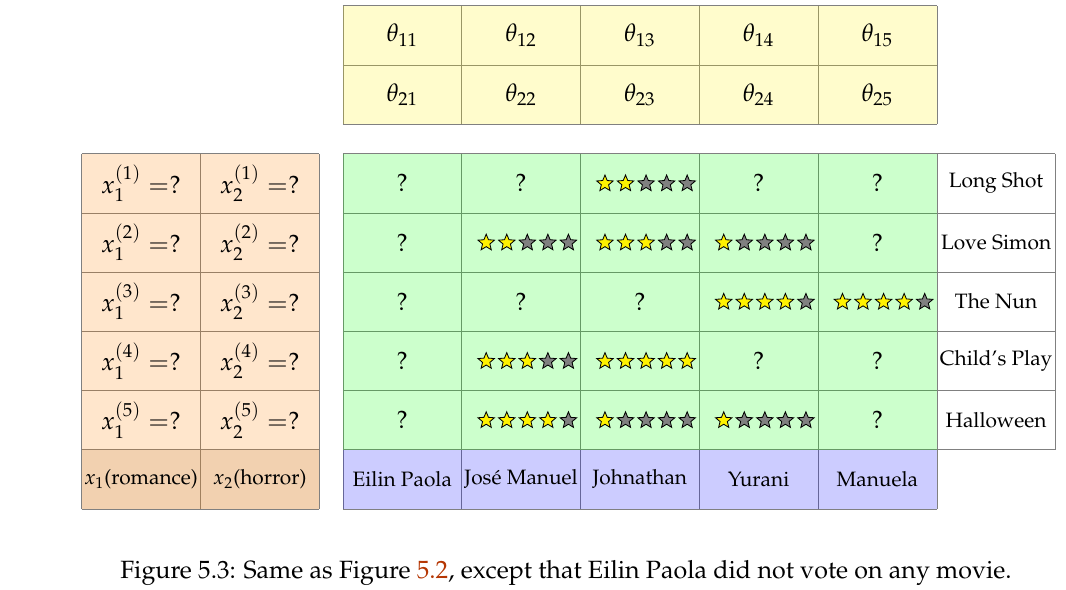

Vemos que Eilin Paola al no tener nada, usando la matriz de **masking* tenos que $X=0$, entonces


$$J^{(j_0)} = \frac{\lambda}{2} \| ( \Theta_{j_0} \|_F^2  .$$
Pero el minimo de esto se da en $\Theta=0$.
Todo 0 para Eilin Paola. Como resolvemos este problema

Veamos el concepto de mean normalizacion

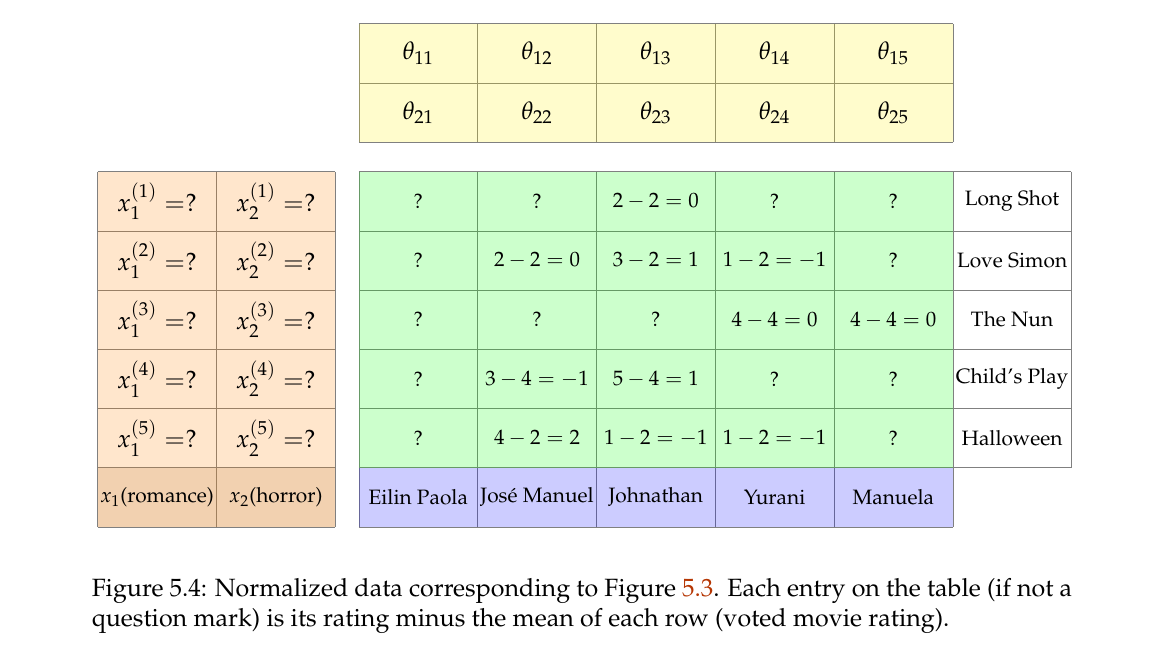

Con la matriz $Y$ normalizada (se resto media), se resuelve el problema. Al final volvemos a sumar las medias por fila. En el caso de Eilin Paola obtenemos

$$y_{i1} ←  (X^{(i)})^T \Theta_1  + \mu_i.$$

# OCR : Optical Character Recognition

Extrae caracteres de imagenes. Las aplicaciones son muchisimas, al final de la clase listo algunas.

Cual es el proceso

* Detecction de texto: Se busca donde hay texto en la imagen
* Segmentacion de texto: El texto se parte en letras
* Clasificacion: Cada letra se pasa a un caracter del sistema. Recuerden las tareas de MNIST.
* Word Processing: Luego de construidas las frases toca filtrarlas con un procesador de palabra. Por ejemplo el 0 se parace a una O, el 1 a una l.



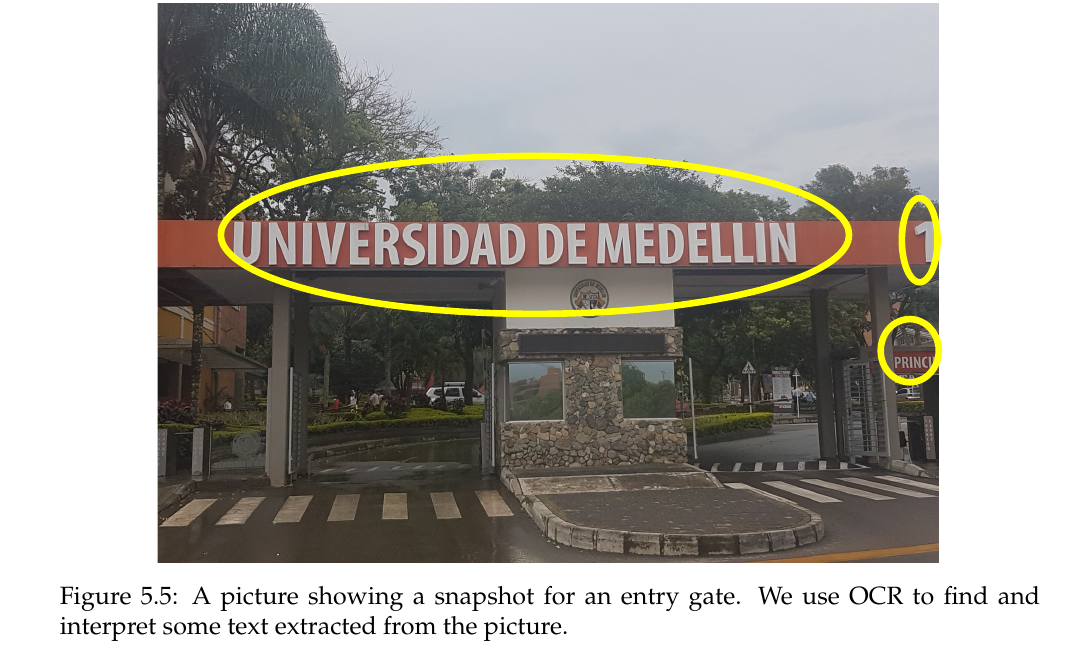

Como se detecta donde hay texto?

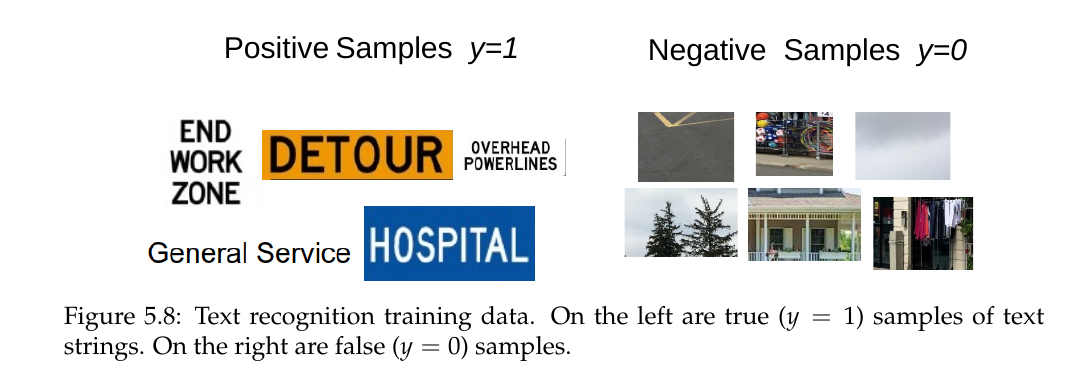

La figura anterior muestra unas muestras positivas y otras negativas de donde hay texto. Para esto se entrenan redes neuronales.

* **Segmentacion**

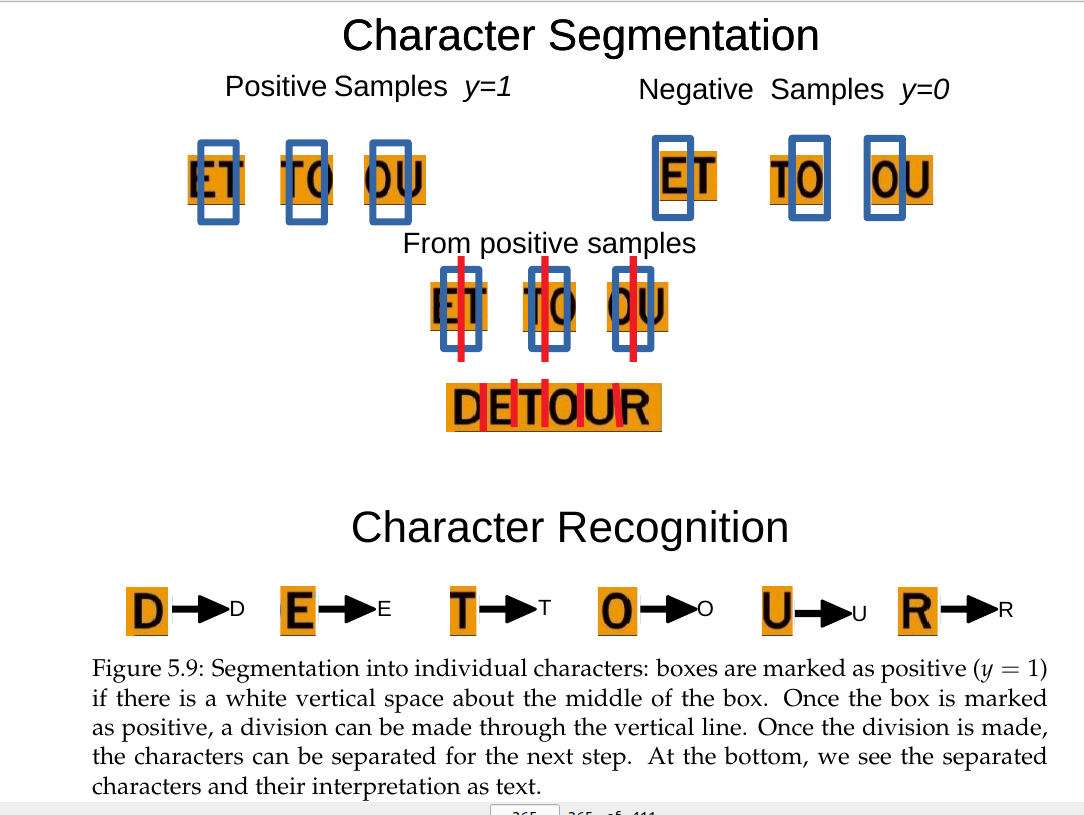

Una vez se tenga la segmentacion, cada simbolo se convierte en un caracter de computador (recuerden el MNIST).
Se unen los caracteres formando palabras y por medio de un procesador de texto, se pule el texto.

En resumen, el **pipeline** el proceso es.


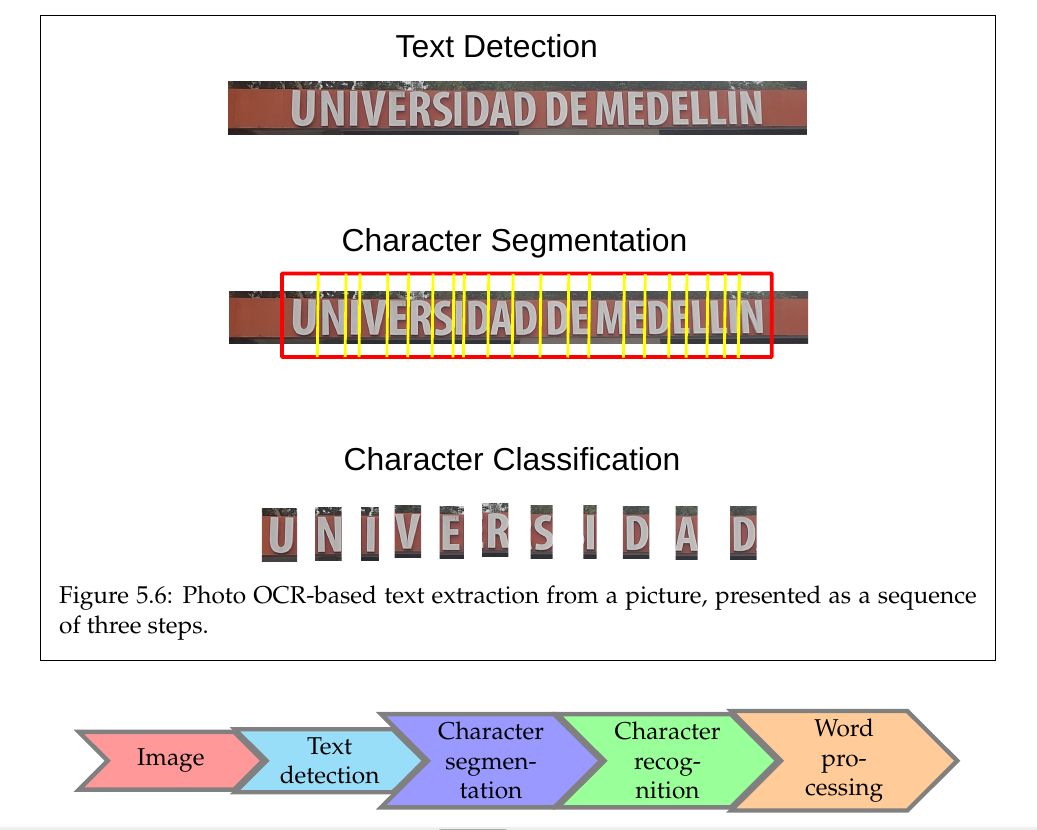

## Aplicaciones:
* Buscar en figuras, texto en un lenguaje particular
* Traducir de una figura a texto (al mismo o otro lenguaje)
* Escanear documentos y volverlos digitales. Cambiar de foto a texto. Para reducir almacenamiento. En un juzgado.
* Convertir documentos a PDF inteligente.
* Carros autonomos.
